# Datathon 2024

### 1. Define the problem
Verilerde Girişimcilik Vakfı'nın 2014 yılından itibaren aldığı başvuruları ve Değerlendirme Puanı isimli kolonu gözlemleyebilirsiniz (train.csv). Bu dosyanın içerisinde aynı zamanda başvuran kişilerin anonim olarak paylaşılmış üniversite, aile detayları, ikamet detayları vb. bir çok bilgiyi gözlemleyebilirsiniz.
Bu bilgilerden yola çıkarak 11.049  kişinin değerlendirme puanını tahmin etmek (Regression Problemi)

### 2. Evaluation
Yarışmanın başarısını ölçmek için kullanılacak metrik ise RMSE olacaktır.


### 3. Data 
Veri içerisinde bulunan sütunlar:https : https://www.kaggle.com/competitions/datathon-2024/data


## EDA

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Datayi getir
train = pd.read_csv('datas/train.csv', low_memory=False)
test = pd.read_csv('datas/test_x.csv', low_memory=False)

In [3]:
# butun columnlara bakmamizi saglar
from IPython import display

pd.set_option('display.max_columns', None)

In [4]:
train.head(2)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1


In [5]:
test.head(2)

,Basvuru Yili,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2023,Kadın,21.06.2002 00:00,Amasya,Amasya,Munzur Üniversitesi,Devlet,NaN,Hayır,Sosyal Hizmet,1,2.50 - 2.99,NaN,Amasya Suluova Şehit Muharrem Saygun Anadolu L...,NaN,Amasya,Devlet,Eşit Ağırlık,NaN,50 - 74,Hayır,-,-,İlkokul,Evet,Özel Sektör,Ortaokul,Evet,Diğer,2.0,Hayır,NaN,Evet,Takım Oyuncusu,Evet,Kızılay da gönüllü dağıtım,NaN,Hayır,-,Evet,NaN,NaN,0
1,2023,Kadın,11.05.2004 00:00,Konya,Konya,Hacettepe Üniversitesi,Devlet,NaN,Hayır,Uluslararası İlişkiler,1,Hazırlığım,NaN,Açık Öğretim Lisesi,NaN,Konya,Devlet,Eşit Ağırlık,NaN,75 - 100,Hayır,-,-,İlkokul,Hayır,-,İlkokul,Evet,Özel Sektör,3.0,Hayır,NaN,Evet,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,1


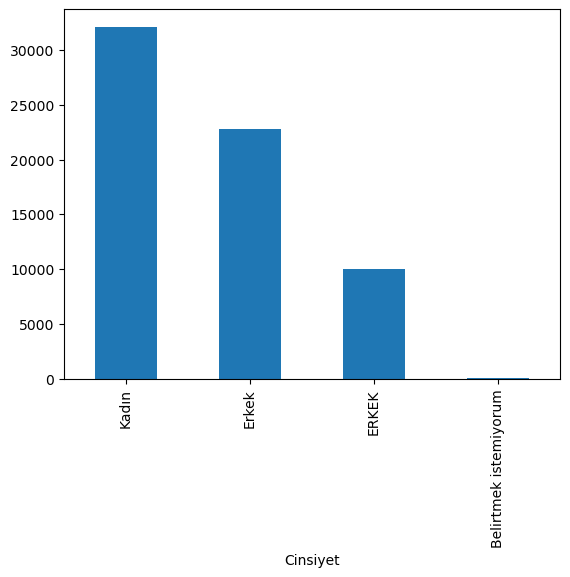

In [6]:
train['Cinsiyet'].value_counts().plot.bar();

In [7]:
# Let's check how much missing value we have
length = len(train)
null_counts = train.isna().sum()
df_null_counts = pd.DataFrame({'Column Name': null_counts.index, 'Null Count': null_counts.values})
df_null_counts = df_null_counts.reset_index(drop=True)
df_null_counts.sort_values(by=['Null Count'], ascending=False, inplace=True)
df_null_counts['Null Count'] = df_null_counts['Null Count']/length # For seeing percentage

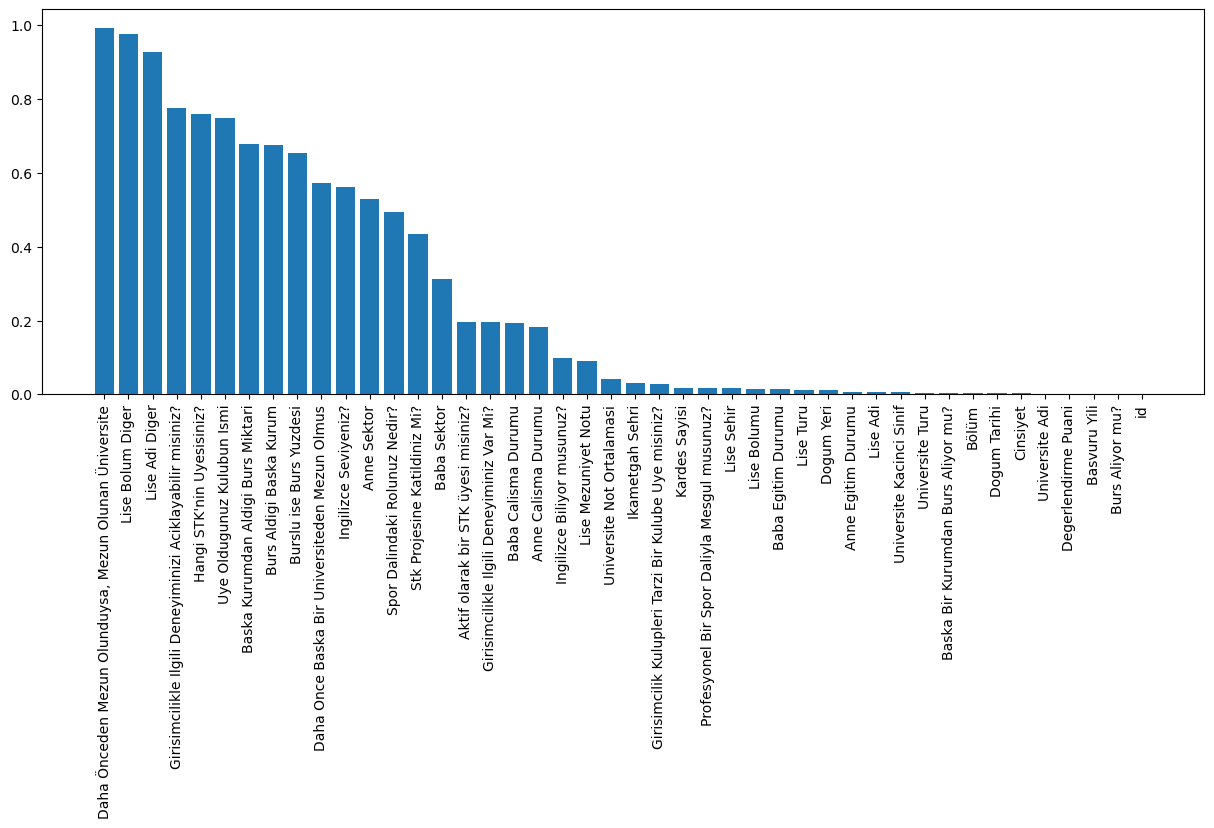

In [8]:
# Let's visulize
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(df_null_counts['Column Name'], df_null_counts['Null Count']);

In [9]:
# Bazı kolonlar test setinde olmadığı için bazıları ise boş olduğu için kaldıralım
dropped_columns=["Burslu ise Burs Yuzdesi","Daha Once Baska Bir Universiteden Mezun Olmus","Lise Adi Diger","Lise Bolum Diger","Uye Oldugunuz Kulubun Ismi",
                 "Stk Projesine Katildiniz Mi?","Ingilizce Seviyeniz?","Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",
                 "Baska Kurumdan Aldigi Burs Miktari",]
train=train.drop(dropped_columns,axis=1)
test=test.drop(dropped_columns, axis=1)

In [10]:
train['Dogum Tarihi'].value_counts()

Dogum Tarihi
1/1/70 2:00         1655
1/1/00 0:00          179
1/1/01 0:00          154
1/1/1997             139
1/1/1998             129
                    ... 
1992-05-12             1
1997-03-19             1
1996-08-17             1
1991-04-23             1
12.11.2003 00:00       1
Name: count, Length: 13498, dtype: int64

In [11]:
train['Universite Turu'].value_counts()

Universite Turu
Devlet    37885
DEVLET    15377
Özel       8336
ÖZEL       3272
Name: count, dtype: int64

In [12]:
# Lets concatanite two df to visulize is Universite Turu impact to Degerlendirme puanina
devlet = pd.concat([train[train['Universite Turu'] == 'Devlet'], train[train['Universite Turu'] == 'DEVLET']])    
devlet['Universite Turu'] = 'Devlet'
ozel = pd.concat([train[train['Universite Turu'] == 'Özel'], train[train['Universite Turu'] == 'ÖZEL']])   
ozel['Universite Turu'] = 'Özel'
all = pd.concat([devlet, ozel])

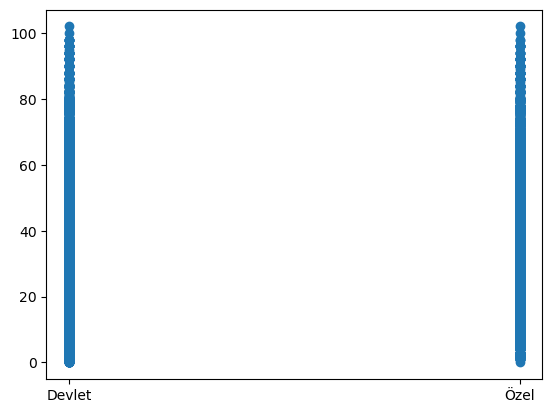

In [13]:
fig = plt.figure()
plt.scatter(x=all['Universite Turu'], y=all['Degerlendirme Puani']);

In [14]:
train[train['Universite Turu'] == 'ÖZEL']['Degerlendirme Puani'].mean(), train[train['Universite Turu'] == 'DEVLET']['Degerlendirme Puani'].mean()

(29.06448655256724, 24.367822071925602)

Boylelikle Universite Turunun buyuk bir etkisi oldugunu gorebiliyoruz

## LowerCase

In [15]:
# Bu method verilerimizi düzgün bir biçimde lower case yapacak
def turkish_lowercase(text):
    replacements = {
        'İ': 'i',
        'I': 'ı',
        'Ş': 'ş',
        'Ç': 'ç',
        'Ğ': 'ğ',
        'Ö': 'ö',
        'Ü': 'ü',
        'ı': 'ı',
        'ş': 'ş',
        'ç': 'ç',
        'ğ': 'ğ',
        'ö': 'ö',
        'ü': 'ü'
    }
    return ''.join(replacements.get(char, char) for char in text).lower()

In [16]:
# lowercase yapilacak columnlari bulalim.
low_columns = ['Cinsiyet', 'Dogum Yeri', "Ikametgah Sehri", 
           'Universite Turu', 'Burs Aliyor mu?',
           'Lise Sehir', 'Anne Egitim Durumu', 'Burs Aldigi Baska Kurum',
           'Anne Sektor', 'Baba Calisma Durumu', 'Baba Sektor', 'Spor Dalindaki Rolunuz Nedir?',"Dogum Yeri","Baba Egitim Durumu"]

In [17]:
# Lowecase yapan method
def make_lowercase(list_of_low, df):
    for label in list_of_low:
        df[label]=df[label].fillna("-")
        df[label] = df[label].apply(turkish_lowercase)

In [18]:
make_lowercase(low_columns, train)

In [19]:
# Lowercase methodumuzu iki farkli dataframemiz icin de cagiriyoruz
make_lowercase(low_columns, train)
make_lowercase(low_columns, test)

## University Note translate

In [20]:
# Fill the empty note data
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].fillna('missing')

In [21]:
# Universite Notunu duzgun formata uyarlayiniz.
Univertiy_map = {'Ortalama bulunmuyor': 'missing',
                 'ORTALAMA BULUNMUYOR': 'missing',
                 'Not ortalaması yok': 'missing',
                 'Hazırlığım': 'Hazırlığım',
                 '3.50-3': '3.00 - 3.49',
                 '3.00-2.50': '2.50 - 2.99',
                 '2.50 ve altı': '1.80 - 2.49',
                 '3.00 - 4.00': '3.00 - 3.49',
                 '3.50 - 4.00': '3.50 - 4.00',
                 '3.00 - 3.50': '3.00 - 3.49',
                 '2.50 -3.00': '2.50 - 2.99',
                 '4-3.5': '3.50 - 4.00',
                 '2.50 - 3.00': '2.50 - 2.99',
                 '2.00 - 2.50': '1.80 - 2.49',
                 '1.00 - 2.50': '1.80 - 2.49',
                 '4.0-3.5': '3.50 - 4.00',
                 '3.00 - 3.49': '3.00 - 3.49',
                 '2.50 - 2.99': '2.50 - 2.99',
                 '1.80 - 2.49': '1.80 - 2.49',
                 '0 - 1.79': '0 - 1.79',
                 'missing': 'missing'
                }
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].map(Univertiy_map)

In [22]:
# Visulize test unique values
pd.unique(test['Universite Not Ortalamasi'])

array(['2.50 - 2.99', 'Hazırlığım', '3.00 - 3.49', '1.80 - 2.49',
       '3.50 - 4.00', '0 - 1.79'], dtype=object)

In [23]:
# Visulize train unique values
pd.unique(train['Universite Not Ortalamasi'])

array(['3.00 - 3.49', '2.50 - 2.99', 'missing', '1.80 - 2.49',
       '3.50 - 4.00', 'Hazırlığım', '0 - 1.79'], dtype=object)

In [24]:
train['Universite Not Ortalamasi'].isna().sum()

0

## Spor dalindaki rolunuz nedir kolonunu duzenleme

In [25]:
spor_mapping = {
    'diğer': 'Diğer',
    '0': '-',
    '-': '-',
    'kaptan': 'Lider/Kaptan',
    'kaptan / li̇der': 'Lider/Kaptan',
    'di̇ğer': 'Diğer', 
    'lider/kaptan': 'Lider/Kaptan', 
    'bireysel': 'Bireysel Spor',
    'takım oyuncusu': 'Takım Oyuncusu'
}

In [26]:
train["Spor Dalindaki Rolunuz Nedir?"] = train["Spor Dalindaki Rolunuz Nedir?"].fillna('-')

In [27]:
# Visulize test unique values
pd.unique(test["Spor Dalindaki Rolunuz Nedir?"])

array(['takım oyuncusu', 'bireysel spor', '-', 'lider/kaptan', 'diğer'],
      dtype=object)

In [28]:
# Visulize train unique values
pd.unique(train["Spor Dalindaki Rolunuz Nedir?"])

array(['diğer', '0', '-', 'kaptan', 'kaptan / lider', 'lider/kaptan',
       'bireysel', 'takım oyuncusu'], dtype=object)

In [29]:
test["Spor Dalindaki Rolunuz Nedir?"].isna().sum()

0

In [30]:
train["Spor Dalindaki Rolunuz Nedir?"].isna().sum()

0

In [31]:
train['Spor Dalindaki Rolunuz Nedir?'] = train['Spor Dalindaki Rolunuz Nedir?'].map(spor_mapping)

## Lise Mezuniyet Notu Duzenleme

In [32]:
train["Lise Mezuniyet Notu"].value_counts(),test["Lise Mezuniyet Notu"].value_counts()

(Lise Mezuniyet Notu
 75 - 100              22433
 84-70                  9141
 100-85                 6967
 4.00-3.50              3689
 50 - 75                3115
 3.00 - 4.00            3101
 3.50-3.00              2759
 3.50-3                 2330
 69-55                  2162
 3.00-2.50              2153
 50 - 74                1007
 2.50 ve altı            226
 54-45                    88
 25 - 50                  14
 Not ortalaması yok       11
 44-0                      6
 0 - 25                    3
 25 - 49                   2
 0 - 24                    1
 Name: count, dtype: int64,
 Lise Mezuniyet Notu
 75 - 100    9742
 50 - 74     1301
 25 - 49        6
 Name: count, dtype: int64)

In [33]:
bir="75-100"
iki="50 - 74"
uc="25 - 49"
lise_mezuniyet_map={
    "75 - 100":bir,
    "84-70":bir,#85-75=10 fark 75-70=5 fark
    "100-85":bir,
    "4.00-3.50":bir,
    "50 - 75":iki,
    "3.00 - 4.00":bir ,
    "3.50-3.00":bir ,
    "3.50-3":bir,
    "69-55":iki,
    "3.00-2.50":iki,
    "50 - 74":iki,
    "2.50 ve altı":uc,
    "25 - 50":uc,
    "25 - 49":uc
}
train['Lise Mezuniyet Notu'] = train['Lise Mezuniyet Notu'].map(lise_mezuniyet_map)

In [34]:
values_to_drop=["Not ortalaması yok","44-0","0 - 25","0 - 24"]
indexes_to_drop = train[train['Lise Mezuniyet Notu'].isin(values_to_drop)].index
train = train.drop(indexes_to_drop)

In [35]:
train["Lise Mezuniyet Notu"].value_counts(),test["Lise Mezuniyet Notu"].value_counts()

(Lise Mezuniyet Notu
 75-100     50420
 50 - 74     8437
 25 - 49      242
 Name: count, dtype: int64,
 Lise Mezuniyet Notu
 75 - 100    9742
 50 - 74     1301
 25 - 49        6
 Name: count, dtype: int64)

In [36]:
# null değerleri en çok değer ile doldur
train['Lise Mezuniyet Notu'] = train['Lise Mezuniyet Notu'].fillna("75-100")

## Anne Baba Sektor Verilerini Duzenle

In [37]:
test['Anne Sektor'].unique(),test['Baba Sektor'].unique()

(array(['özel sektör', '-', 'kamu', 'diğer'], dtype=object),
 array(['diğer', 'özel sektör', '-', 'kamu'], dtype=object))

In [38]:
train['Anne Sektor'].unique(),train['Baba Sektor'].unique()

(array(['0', 'kamu', 'özel sektör', 'diğer', '-'], dtype=object),
 array(['0', 'özel sektör', 'kamu', '-', 'diğer'], dtype=object))

In [39]:
train["Anne Sektor"] = train["Anne Sektor"].fillna('-')
train["Baba Sektor"] = train["Baba Sektor"].fillna('-')

In [40]:
sektor_mapping = {
    'diğer': 'Diğer',
    '0': '-',
    '-': '-',
    'kamu': 'Kamu',
    'özel sektör': 'Özel Sektör',
    'di̇ğer': 'Diğer'
}

In [41]:
test["Anne Sektor"].isna().sum(),test["Baba Sektor"].isna().sum()

(0, 0)

In [42]:
train["Anne Sektor"].isna().sum(),train["Baba Sektor"].isna().sum()

(0, 0)

In [43]:
train['Anne Sektor'] = train['Anne Sektor'].map(sektor_mapping)
train['Baba Sektor'] = train['Baba Sektor'].map(sektor_mapping)

In [44]:
train['Anne Sektor'].unique(),train['Baba Sektor'].unique()

(array(['-', 'Kamu', 'Özel Sektör', 'Diğer'], dtype=object),
 array(['-', 'Özel Sektör', 'Kamu', 'Diğer'], dtype=object))

## Anne Baba Egitim Durumu

In [45]:
test["Anne Egitim Durumu"].value_counts(),test["Baba Egitim Durumu"].value_counts()

(Anne Egitim Durumu
 ilkokul          3977
 lise             2362
 üniversite       1798
 eğitimi yok      1457
 ortaokul         1272
 yüksek lisans     143
 doktora            40
 Name: count, dtype: int64,
 Baba Egitim Durumu
 ilkokul          3144
 üniversite       2728
 lise             2706
 ortaokul         1666
 eğitimi yok       427
 yüksek lisans     272
 doktora           106
 Name: count, dtype: int64)

In [46]:
train["Baba Egitim Durumu"]=train["Baba Egitim Durumu"].fillna("missin")

In [47]:
train["Baba Egitim Durumu"]=train["Baba Egitim Durumu"].apply(turkish_lowercase)

In [48]:
train["Anne Egitim Durumu"].value_counts(),train["Baba Egitim Durumu"].value_counts()

(Anne Egitim Durumu
 ilkokul mezunu             15800
 lise                       12049
 ilkokul                    10351
 üniversite                  7937
 eğitim yok                  4746
 ortaokul mezunu             3907
 eğitimi yok                 3605
 ortaokul                    3126
 lise mezunu                 1346
 üniversite mezunu           1075
 yüksek lisans                427
 -                            406
 doktora                      142
 yüksek lisans / doktora      123
 yüksek lisans / doktara       85
 Name: count, dtype: int64,
 Baba Egitim Durumu
 lise                       14490
 üniversite                 13407
 ilkokul mezunu             11173
 ilkokul                     8257
 ortaokul mezunu             5071
 ortaokul                    4109
 üniversite mezunu           1731
 lise mezunu                 1405
 eğitim yok                  1396
 eğitimi yok                 1102
 -                           1007
 yüksek lisans                963
 doktora      

In [49]:
egitim_durumu_mapping={
    "ilkokul mezunu":"İlkokul",
    "ilkokul":"İlkokul",
    "lise":"Lise",
    "lise mezunu":"Lise",
    "ortaokul mezunu":"Ortaokul",
    "ortaokul":"Ortaokul",
    "eğitimi yok":"Eğitimi yok",
    "eğitim yok":"Eğitimi yok",
    "0":"Eğitimi yok",
    "üniversite mezunu":"Üniversite",
    "üniversite":"Üniversite",
    "yüksek lisans":"Yüksek Lisans",
    "doktora":"Doktora",
    "yüksek lisans / doktora":"Doktora",
    "yüksek lisans / doktara":"Doktora",
    "missing":"missing"   
}

In [50]:
train['Anne Egitim Durumu'] = train['Anne Egitim Durumu'].map(egitim_durumu_mapping)
train['Baba Egitim Durumu'] = train['Baba Egitim Durumu'].map(egitim_durumu_mapping)

In [51]:
test["Anne Egitim Durumu"].value_counts(),test["Baba Egitim Durumu"].value_counts()

(Anne Egitim Durumu
 ilkokul          3977
 lise             2362
 üniversite       1798
 eğitimi yok      1457
 ortaokul         1272
 yüksek lisans     143
 doktora            40
 Name: count, dtype: int64,
 Baba Egitim Durumu
 ilkokul          3144
 üniversite       2728
 lise             2706
 ortaokul         1666
 eğitimi yok       427
 yüksek lisans     272
 doktora           106
 Name: count, dtype: int64)

In [ ]:
# 242 null değeri kaldıralım
train=train.dropna(subset=['A'])

## Baska Kurumdan Burs Aliyor Mu

In [109]:
train["Baska Bir Kurumdan Burs Aliyor mu?"].value_counts()

Baska Bir Kurumdan Burs Aliyor mu?
Hayır    48003
Evet     16331
Name: count, dtype: int64

In [110]:
# anne eğitim durumundan 213 null değer olduğu için null değerleri dropladım
train=train.dropna(subset=['Anne Egitim Durumu'])

## Burs aldigi baska kurum duzenleme

Burslari 3 parcaya ayirdim
1. Kyk Bursu alan - kyk
2. Diger yerlerden burs alan - diger
3. Burs almayan - yok

In [52]:
array = test['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-                                         6524
kyk                                       1790
kyk bursu                                  300
kredi ve yurtlar kurumu                    215
kredi yurtlar kurumu                       200
devlet                                     160
devlet bursu                                65
gençlik ve spor bakanlığı                   63
kyk devlet bursu                            50
kyk burs                                    47
kyk bursu alıyorum                          45
kredi ve yurtlar genel müdürlüğü            41
gsb                                         29
mehmet zorlu vakfı                          26
tev                                         26
türk eğitim vakfı                           25
kyk bursu alıyorum.                         23
tübitak                                     22
devlet kyk bursu                            20
kyk kredi                                   19
çağdaş yaşamı destekleme derneği    

In [53]:
burs_tops = []
array = train['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-                                         48688
kyk                                        6666
kredi ve yurtlar kurumu                     958
kredi yurtlar kurumu                        813
kyk bursu                                   526
devlet                                      374
devlet bursu                                145
çağdaş yaşamı destekleme derneği            123
tev                                         108
k                                           103
kyk devlet bursu                            101
kyk kredi                                    92
ky                                           88
türk eğitim vakfı                            86
gençlik ve spor bakanlığı                    83
kyk bursu alıyorum                           79
kredi ve yurtlar genel müdürlüğü             69
tübitak                                      68
başbakanlık bursu                            65
kyk burs                                     62
başbakanlık     

In [54]:
kyk = 'kyk'
burs_mapping_test ={
'-': '-',
"KYK": kyk,                              
"Kyk": kyk,                                  
"kyk": kyk,                                  
"Devlet": kyk,                               
"Kredi ve Yurtlar Kurumu": kyk,              
"Kredi Yurtlar Kurumu": kyk,                 
"Kyk bursu": kyk,                            
"KYK bursu": kyk,                            
"Devlet bursu": kyk,                         
"Kredi yurtlar kurumu": kyk,                 
"Kredi ve yurtlar kurumu": kyk,              
"KYK Bursu": kyk,                            
"Gençlik ve Spor Bakanlığı": kyk,            
"Kredi ve Yurtlar Genel Müdürlüğü": kyk,     
"KYK burs": kyk,                             
"KYK BURSU": kyk,                            
"Kyk devlet bursu": kyk,                     
"GSB": kyk,                                  
"Kyk bursu alıyorum": kyk,                   
"KYK bursu alıyorum.": kyk,                 
"Kyk Bursu": kyk,                            
"kyk bursu": kyk,                            
"devlet": kyk,                             
"KYK bursu alıyorum": kyk,                  
"KREDİ YURTLAR KURUMU": kyk,         
}

In [55]:
kyk = 'kyk'
burs_mapping_train = {
'kyk': kyk,                                  
'-': '-',                                        
'kredi ve yurtlar kurumu': kyk,                   
'kredi yurtlar kurumu': kyk,                      
'kyk bursu': kyk,                                 
'devlet': kyk,                                    
'devlet bursu': kyk,                              
'k': kyk,                                         
'kyk devlet bursu': kyk,                          
'ky': kyk,                                        
'kyk kredi': kyk,                                 
'gençlik ve spor bakanlığı': kyk,                 
'kyk bursu alıyorum': kyk,                        
'kredi̇ ve yurtlar kurumu': kyk,                  
'kredi ve yurtlar genel müdürlüğü': kyk,          
'kyk burs': kyk,                                  
'kredi̇ yurtlar kurumu': kyk,                     
'yüksek öğrenim kredi ve yurtlar kurumu': kyk,    
}

In [56]:
train['Burs Aldigi Baska Kurum'].isna().sum()

0

In [57]:
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].fillna('-')

In [58]:
test['Burs Aldigi Baska Kurum'].isna().sum()

0

In [59]:
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].map(burs_mapping_train)

In [60]:
# simdi de farkli kurumlardan burs alan ogrencileri null olarak atadigindan onlara deger verelim
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].fillna('diger')

In [61]:
test['Burs Aldigi Baska Kurum'] = test['Burs Aldigi Baska Kurum'].map(burs_mapping_test)

In [62]:
# simdi de farkli kurumlardan burs alan ogrencileri null olarak atadigindan onlara deger verelim
test['Burs Aldigi Baska Kurum'] = test['Burs Aldigi Baska Kurum'].fillna('diger')

Kontrol edelim istedigimiz donusumu yapabildik mi

In [63]:
array = test['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-        6524
diger    2275
kyk      2250
Name: count, dtype: int64

In [64]:
burs_tops = []
array = train['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-        48688
kyk      10209
diger     6228
Name: count, dtype: int64

## Anne - baba sektor durumu


In [65]:
test['Anne Sektor'].unique(),test['Baba Sektor'].unique()

(array(['özel sektör', '-', 'kamu', 'diğer'], dtype=object),
 array(['diğer', 'özel sektör', '-', 'kamu'], dtype=object))

In [66]:
train['Anne Sektor'].unique(),train['Baba Sektor'].unique()

(array(['-', 'Kamu', 'Özel Sektör', 'Diğer'], dtype=object),
 array(['-', 'Özel Sektör', 'Kamu', 'Diğer'], dtype=object))

In [67]:
train["Anne Sektor"] = train["Anne Sektor"].fillna('-')
train["Baba Sektor"] = train["Baba Sektor"].fillna('-')

In [68]:
sektor_mapping = {
    'diğer': 'Diğer',
    '0': '-',
    '-': '-',
    'kamu': 'Kamu',
    'özel sektör': 'Özel Sektör',
    'di̇ğer': 'Diğer'
}


In [69]:
test["Anne Sektor"].isna().sum(),test["Baba Sektor"].isna().sum()

(0, 0)

In [70]:
train["Anne Sektor"].isna().sum(),train["Baba Sektor"].isna().sum()

(0, 0)

In [71]:
train['Anne Sektor'] = train['Anne Sektor'].map(sektor_mapping)
train['Baba Sektor'] = train['Baba Sektor'].map(sektor_mapping)

In [72]:
train['Anne Sektor'].unique(),train['Baba Sektor'].unique()

(array(['-', nan], dtype=object), array(['-', nan], dtype=object))

## Universite Sinifi

 test setinde boş değer ve mezun değerleri olmadığı için bunları dropluyorum
 
 370 tane null değeri de dropluyorum

In [78]:
train["Universite Kacinci Sinif"].value_counts(),test["Universite Kacinci Sinif"].value_counts()


(Universite Kacinci Sinif
 2                21773
 3                16956
 4                13113
 1                10260
 Hazırlık          1275
 5                  961
 Mezun              178
 6                  177
 hazırlık            33
 Yüksek Lisans       15
 Tez                  7
 0                    3
 Name: count, dtype: int64,
 Universite Kacinci Sinif
 2           3315
 3           3039
 4           2466
 1           1803
 Hazırlık     233
 5            164
 6             29
 Name: count, dtype: int64)

In [79]:
values_to_drop=["Mezun","Yüksek Lisans","Tez","0",np.nan]

In [80]:
indexes_to_drop = train[train['Universite Kacinci Sinif'].isin(values_to_drop)].index
train = train.drop(indexes_to_drop)

## Dogum Yerlerini Duzenleyelim

In [82]:
# il ilce veri setini koyalım
il_ilce=pd.read_csv("datas/il_ilce.csv")
il_ilce.il=il_ilce.il.apply(turkish_lowercase)
il_ilce.ilce=il_ilce.ilce.apply(turkish_lowercase)
il_ilce.il.value_counts()

il
istanbul     39
konya        31
izmir        30
ankara       25
kastamonu    20
             ..
hakkâri       5
ığdır         4
bartın        4
kilis         4
bayburt       3
Name: count, Length: 81, dtype: int64

In [83]:
dogum_yeri=train["Dogum Yeri"]

In [84]:
# re modulu ile stringelre ayıralım
import re
a="altindag/ankara sakarya"
result = re.split(r'[ ,/-]', a)

In [87]:
# il ilce veri setini {sehir:ilçeler} olacak şekilde bir dictionarye dönüştürelim
city_district_dict = il_ilce.groupby('il')['ilce'].apply(list).to_dict()


In [92]:
def convert_city(data):
    sehirler=[]
    for k in data:
        appended=False
        result = re.split(r'[ ,/-]', k)
        for i in result:
            if appended==True:
                break
            for il,ilce in city_district_dict.items():
                if i == il:
                    sehirler.append(il)
                    appended=True
                    break
                elif i in ilce:
                    sehirler.append(il)
                    appended=True
                    break
        if appended==False:
            sehirler.append("Diger")
            append=True
    return sehirler

In [93]:
len(convert_city(dogum_yeri))


64548

In [94]:
train["Dogum Yeri"]=convert_city(dogum_yeri)

In [96]:
train["Dogum Yeri"].head(40)

0         ankara
1       istanbul
2         samsun
3     diyarbakır
5       istanbul
6       istanbul
7       istanbul
8       erzincan
9          sivas
10       kayseri
11          uşak
12          rize
13        ankara
14      adıyaman
15       erzurum
16         Diger
17         konya
18         izmir
19       trabzon
20          kars
21      kırşehir
23         adana
24         izmir
25      istanbul
26        ankara
27         adana
28         adana
29      istanbul
30       sakarya
31      istanbul
32         adana
33        ankara
34        ankara
35         muğla
36          kars
37         hatay
38         Diger
39         izmir
40      istanbul
42        mersin
Name: Dogum Yeri, dtype: object

In [98]:
train["Dogum Yeri"].value_counts()

Dogum Yeri
istanbul     9476
Diger        6293
ankara       4317
izmir        2414
bursa        1955
             ... 
çankırı        98
gümüşhane      84
bayburt        79
hakkâri        77
tunceli        56
Name: count, Length: 82, dtype: int64

## Ikametgah Duzenleyelim

In [89]:
train["Ikametgah Sehri"]=train["Ikametgah Sehri"].fillna("missing")

In [90]:
ikametgah=train["Ikametgah Sehri"]
ikametgah.str.lower()
ikametgah[:10]

0               ankara
1             istanbul
2             istanbul
3             istanbul
5             istanbul
6             istanbul
7             istanbul
8     esenler/istanbul
9             istanbul
10             kayseri
Name: Ikametgah Sehri, dtype: object

In [99]:
train["Ikametgah Sehri"]=convert_city(ikametgah)
train["Ikametgah Sehri"]

0          ankara
1        istanbul
2        istanbul
3        istanbul
5        istanbul
           ...   
65120    istanbul
65121       muğla
65122      mersin
65123      samsun
65124       hatay
Name: Ikametgah Sehri, Length: 64548, dtype: object

In [100]:
train["Ikametgah Sehri"].value_counts()

Ikametgah Sehri
istanbul    16608
Diger        7817
ankara       6542
izmir        3134
bursa        1776
            ...  
kilis          58
artvin         56
çankırı        49
ardahan        34
hakkâri        29
Name: count, Length: 82, dtype: int64

## Kardes Sayisini duzenleme

In [101]:
train["Kardes Sayisi"].value_counts()
# çoğu değer 1 o yüzden boş değerleri 1 ile dolduracağım.

Kardes Sayisi
1.0                                             16118
2.0                                             13003
3.0                                              6703
1                                                5957
4.0                                              4588
2                                                3873
0.0                                              3678
5.0                                              3405
3                                                2040
0                                                1367
4                                                 969
5                                                 704
6.0                                               204
7.0                                               154
6                                                 132
10.0                                              127
7                                                 116
8.0                                                97
9.0           

In [102]:
train["Kardes Sayisi"]=train["Kardes Sayisi"].fillna("1")


In [103]:
train=train.drop(14372)


In [104]:
train["Kardes Sayisi"]


0          1
1          1
2          6
3         10
5          3
        ... 
65120    4.0
65121    4.0
65122    3.0
65123    2.0
65124    2.0
Name: Kardes Sayisi, Length: 64547, dtype: object

In [105]:
kardes_sayisi = [int(float(item)) for item in train["Kardes Sayisi"]]
train["Kardes Sayisi"]=kardes_sayisi

In [106]:
train["Kardes Sayisi"].value_counts()


Kardes Sayisi
1     23138
2     16876
3      8743
4      5557
0      5045
5      4109
6       336
7       270
8       168
10      166
9       121
11       10
12        5
13        2
14        1
Name: count, dtype: int64

In [107]:
test["Kardes Sayisi"].value_counts()


Kardes Sayisi
1.0    3612
2.0    2821
4.0    2421
3.0    1490
0.0     705
Name: count, dtype: int64

## Visulazing data

In [73]:
box_plot_columns=["Universite Not Ortalamasi","Burs Aliyor mu?","Lise Mezuniyet Notu","Anne Calisma Durumu",
                  "Baba Calisma Durumu","Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"
                 ,"Profesyonel Bir Spor Daliyla Mesgul musunuz?","Spor Dalindaki Rolunuz Nedir?","Aktif olarak bir STK üyesi misiniz?",
                  "Girisimcilikle Ilgili Deneyiminiz Var Mi?", "Ingilizce Biliyor musunuz?"]

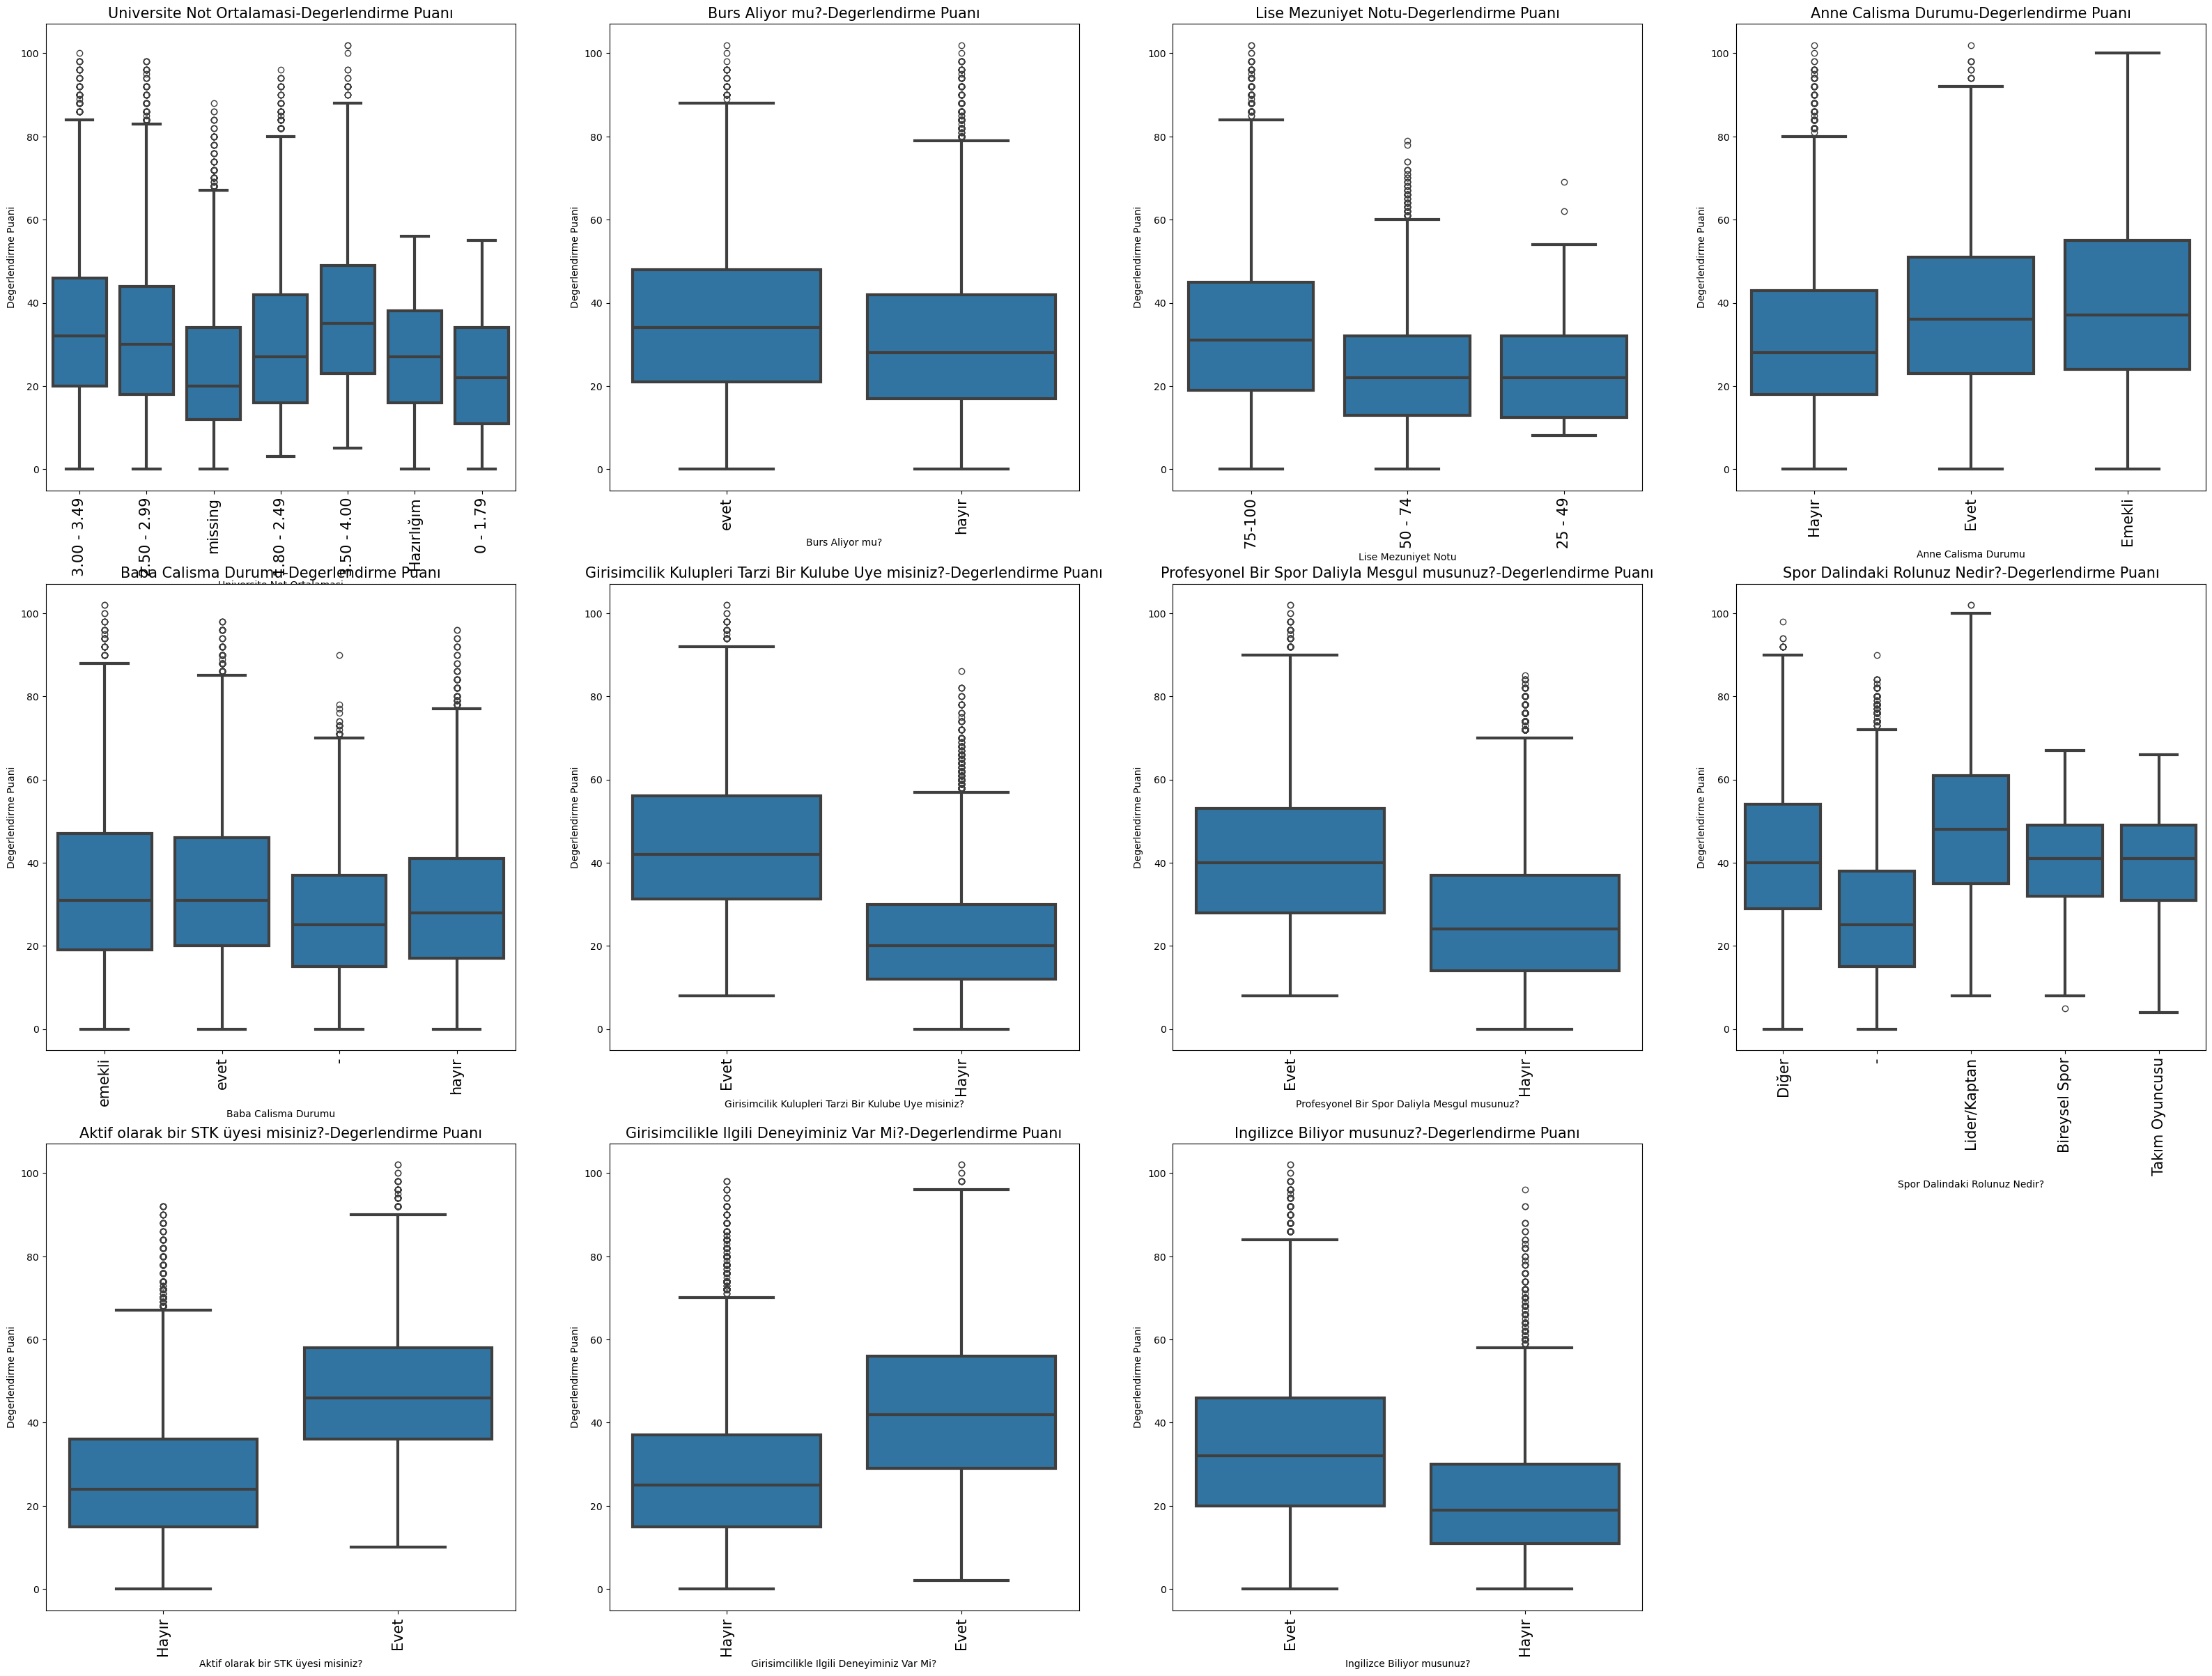

In [74]:
plt.figure(figsize=(40,40))
k=0
for i in box_plot_columns:
    ax=plt.subplot(4,4,k+1)
    k+=1
    ax=sns.boxplot(data=train,x=i,y="Degerlendirme Puani",linewidth=3)
    plt.title(f"{i}-Degerlendirme Puanı",fontsize=15)
    plt.xticks(rotation=90,fontsize=15);

In [75]:
train.to_csv('datas/train_ayarlanmis.csv', index=False)

In [76]:
test.to_csv('datas/test_ayarlanmis.csv', index=False)